Domain –HR

focus –Insights from data

Business challenge/requirementSFO Public Department -referred to as SFO  has captured all the salary data of its employees from the year 2011-2014.  Now we are in the year 2015 and the organization is facing afinancial crisis. As the first step HR wants to rationalize employee coststo save the payroll budget.You have to do data manipulation and analysis on the salary data to answer specific questions for cost savings

1.Compute how much total salary cost has increased from the year 2011 to 2014

2.Which Job Title in the Year 2014 has the highest mean salary?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sal_data=pd.read_csv('Salaries.csv')
sal_data.head(3)

C:\Users\Komal\AppData\Local\Temp\ipykernel_17912\1057645901.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  sal_data=pd.read_csv('Salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [4]:
#1.Compute how much total salary cost has increased from the year 2011 to 2014
sal_data[['Year','TotalPay']]

,Year,TotalPay
0,2011,567595.43
1,2011,538909.28
2,2011,335279.91
3,2011,332343.61
4,2011,326373.19
...,...,...
148643,2014,0.00
148644,2014,0.00
148645,2014,0.00
148646,2014,0.00


In [13]:
filtered_data=sal_data[(sal_data['Year']==2011) | (sal_data['Year']==2014)]
total_sal_by_year=filtered_data.groupby(['Year'])['TotalPay'].sum()

In [15]:
data_2011=total_sal_by_year[2011]
data_2011

2594113030.72

In [16]:
data_2014=total_sal_by_year[2014]
data_2014

2876910951.26

In [17]:
Increased_salary=data_2014-data_2011
Increased_salary

282797920.54000044

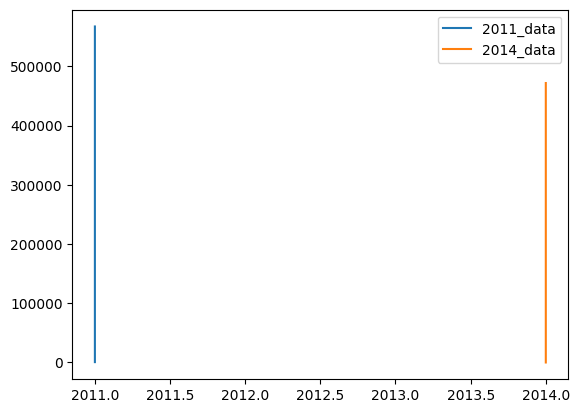

In [20]:
x_2011=sal_data[sal_data['Year']==2011]
x_2014=sal_data[sal_data['Year']==2014]
plt.plot(x_2011['Year'],x_2011['TotalPay'],label='2011_data')
plt.plot(x_2014['Year'],x_2014['TotalPay'],label='2014_data')
plt.legend()
plt.show()

In [21]:
sal_data.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [24]:
#2.Which Job Title in the Year 2014 has the highest mean salary?
new_data=sal_data[sal_data['Year']==2014]

In [26]:
new_data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [29]:
jobtitle_avg_salary_data=new_data.groupby('JobTitle')['TotalPay'].mean()

In [34]:
job_max_sal_name=jobtitle_avg_salary_data.idxmax()
job_max_sal=jobtitle_avg_salary_data.max()
print(job_max_sal_name)
print(job_max_sal)

Chief Investment Officer
339653.7


3.How much money could have been saved in the Year 2014 by stopping OverTimePay?

4.Which are the top 5 common jobsin the Year 2014 and how much do they cost SFO?

5.Who was the top earning employee across all the years?

In [35]:
sal_data.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [41]:
#3.How much money could have been saved in the Year 2014 by stopping OverTimePay?
data_2014=sal_data[sal_data['Year']==2014]
totalsal_2014=data_2014['TotalPay'].sum()
totalovertime_2014=data_2014['OvertimePay'].sum()

In [42]:
money_could_save=totalovertime_2014-totalsal_2014
money_could_save

-2670992351.99

In [48]:
#4.Which are the top 5 common jobsin the Year 2014 and how much do they cost SFO?
filter_data_2014_SFO=sal_data[(sal_data['Year']==2014) & (sal_data['Agency']=='San Francisco')]
top_job_2014=filter_data_2014_SFO.JobTitle.value_counts().head(5)
top_job_2014

JobTitle
Transit Operator                2479
Special Nurse                   1478
Registered Nurse                1234
Public Svc Aide-Public Works     916
Firefighter                      815
Name: count, dtype: int64

In [51]:
top_job_2014.index

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Firefighter'],
      dtype='object', name='JobTitle')

In [52]:
top_job_2014.values

array([2479, 1478, 1234,  916,  815], dtype=int64)

In [50]:
top_job_cost=[]
for i in top_job_2014.index:
    total_sal_jobs=filter_data_2014_SFO[filter_data_2014_SFO['JobTitle']==i]['TotalPay'].sum()
    top_job_cost.append(total_sal_jobs)
    
results = pd.DataFrame({'JobTitle': top_job_2014.index, 'Count': top_job_2014.values, 'TotalCost': top_job_cost})

print("Top 5 Most Common Jobs in 2014 in San Francisco:")
print(results)

Top 5 Most Common Jobs in 2014 in San Francisco:
                       JobTitle  Count     TotalCost
0              Transit Operator   2479  1.520080e+08
1                 Special Nurse   1478  4.949874e+07
2              Registered Nurse   1234  1.444065e+08
3  Public Svc Aide-Public Works    916  8.535454e+06
4                   Firefighter    815  1.132836e+08


In [68]:
sal_data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [69]:
#5.Who was the top earning employee across all the years?
data_year_emp=sal_data.groupby(['Year','EmployeeName'])['TotalPay'].sum()
data_year_emp

Year  EmployeeName          
2011  A BERNARD FATOOH          20039.91
      A ELIZABETH MARCHASIN     26282.86
      A JAMIL NIAZI             87496.21
      A. JAMES ROBERTSON II     19473.92
      AARIC PINGREE             36883.91
                                  ...   
2014  Zulema G Gutierrez        54260.34
      Zulma V Merino-Fuentes    30447.19
      Zun Jin Zhang He          58877.30
      Zuna T Luu                56087.91
      Zuri Jones                66667.54
Name: TotalPay, Length: 141058, dtype: float64

In [71]:
top_employee_row=data_year_emp.groupby('Year').idxmax()
top_employee_row

Year
2011      (2011, KEVIN LEE)
2012      (2012, Kevin Lee)
2013    (2013, Steven  Lee)
2014     (2014, Steven Lee)
Name: TotalPay, dtype: object

In [75]:
top_employee_salary=data_year_emp.groupby('Year').max()

In [76]:
top_employee_salary

Year
2011    809424.84
2012    882994.24
2013    581524.38
2014    561356.09
Name: TotalPay, dtype: float64

In [82]:
for year,employee in top_employee_row.items():
    
    print(f"In {year} employee name {employee[1]} had earned max salary of {top_employee_salary[year]:.2f}")

In 2011 employee name KEVIN LEE had earned max salary of 809424.84
In 2012 employee name Kevin Lee had earned max salary of 882994.24
In 2013 employee name Steven  Lee had earned max salary of 581524.38
In 2014 employee name Steven Lee had earned max salary of 561356.09


In [83]:
#1.Which are the last 5 common jobsin the Year 2014 and how much do they cost SFO?
last_filter_data_2014_SFO=sal_data[(sal_data['Year']==2014) & (sal_data['Agency']=='San Francisco')]
last_job_2014=filter_data_2014_SFO.JobTitle.value_counts().tail(5)
last_job_2014

JobTitle
Claims Process Clerk            1
Asst Dir, Log Cabin Rnch        1
Media Production Specialist     1
Chf Prob Ofc, Juv Court         1
Electric Motor Repair Sprv 1    1
Name: count, dtype: int64

In [84]:
last_job_cost=[]
for i in last_job_2014.index:
    total_sal_jobs=last_filter_data_2014_SFO[last_filter_data_2014_SFO['JobTitle']==i]['TotalPay'].sum()
    last_job_cost.append(total_sal_jobs)
    
results = pd.DataFrame({'JobTitle': last_job_2014.index, 'Count': last_job_2014.values, 'TotalCost': last_job_cost})

print("Top 5 Most Common Jobs in 2014 in San Francisco:")
print(results)

Top 5 Most Common Jobs in 2014 in San Francisco:
                       JobTitle  Count  TotalCost
0          Claims Process Clerk      1   61795.03
1      Asst Dir, Log Cabin Rnch      1   96812.41
2   Media Production Specialist      1   71636.84
3       Chf Prob Ofc, Juv Court      1  198104.36
4  Electric Motor Repair Sprv 1      1  104563.68


In [86]:
sal_data.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


In [93]:
#2.In year 2011 OverTimePay was what percentage of  TotalPayBenefits
data_2011=sal_data[sal_data['Year']==2011]
overtime_2011=data_2011['OvertimePay'].sum()
TotalPayBenefits=data_2011['TotalPayBenefits'].sum()

In [94]:
overtime_2011

163819110.92000002

In [95]:
TotalPayBenefits

2594113030.72

In [96]:
percen_overtime_Total_pay_benefits=(TotalPayBenefits-overtime_2011)*100/TotalPayBenefits
percen_overtime_Total_pay_benefits

93.68496634572118

In [103]:
#3.Which Job Title in the Year 2014 has the lowest mean salary?
data_2014[data_2014['TotalPay']==data_2014['TotalPay'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148647,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,PT


In [104]:
data_2014[data_2014['TotalPay']==data_2014['TotalPay'].min()]['JobTitle']

148647    Counselor, Log Cabin Ranch
Name: JobTitle, dtype: object